# Analitički proračun frekvencija

Diferencijalna jednadžba:
$$ w^{IV}+\frac{ρAw ̈}{EI}=0 $$

Uvodi se funkcija pomaka ovisna o dvije varijable, vremenu i dužini, a ista funkcija se može prikazati kao umnožak dvije sljedeće funkcije.

$$w(x,t)=f(x)*g(t)$$

$$ \frac{f^{IV}}{f}=\frac{-ρA}{EI} \frac {g ̈}{g}=const.=ω^2  \frac{ρA}{EI}=β^4 $$

$$f^{IV}-β^4 f=0$$

Gore je dana diferencijalna jednadžba bez dijela koji ovisi o vremenu, a njena rješenja su:

$$ f = w = C_1 cosh(\beta*x) + C_2 sinh(\beta*x) + C_3 cos(\beta*x) + C_4 sin(\beta*x) $$

$$ \varphi = \beta(C_1 sinh(\beta*x)+ C_2 cosh(\beta*x) - C_3 sin(\beta*x) + C_4 cos(\beta*x)) $$

$$ M = \beta^2 (C_1 cosh(\beta*x) + C_2 sinh(\beta*x) - C_3 cos(\beta*x) - C_4 sin(\beta*x)) $$ 

$$ T = \beta^3 (C_1 sinh(\beta*x) + C_2 cosh(\beta*x) + C_3 sin(\beta*x) - C_4 cos(\beta*x)) $$

In [10]:
# paketi koristeni proracunu

%matplotlib inline
import numpy as np
import sympy
from sympy import sin, cos, sinh, cosh
from sympy.plotting import plot
from sympy import init_printing
init_printing()

## Rješenja diferencijalne jednadžbe

M je dio diferencijalne jednadzbe (dio uz koef. C1,C2,C3,C4) sa svoje prve 3 derivacije.

In [11]:
beta = sympy.symbols("beta")
x = sympy.symbols("x")
l = sympy.symbols("l")

M = sympy.Matrix([[cosh(beta*x),sinh(beta*x),+cos(beta*x),+sin(beta*x)],
               [sinh(beta*x),cosh(beta*x),-sin(beta*x),+cos(beta*x)],
               [cosh(beta*x),sinh(beta*x),-cos(beta*x),-sin(beta*x)],
               [sinh(beta*x),cosh(beta*x),+sin(beta*x),-cos(beta*x)]])   

## Odabir rubnih uvjeta

- rlp - rubni uvjet lijevo prvi
- rld - rubni uvjet lijevo drugi
- rdp - rubni uvjet desno prvi
- rdd - rubni uvjet desno drugi


In [12]:
print ("\n")
print ("rubni uvjeti su: 1) nema progiba 2) nema kuta zaokreta 3) nema momenta 4) nema poprecne sile")
rlp , rld = int(raw_input("rubni uvjet lijevo prvi? ")), int(raw_input("rubni uvjet lijevo drugi? "))
rdp , rdd = int(raw_input("rubni uvjet desno prvi? ")), int(raw_input("rubni uvjet desno drugi? "))




rubni uvjeti su: 1) nema progiba 2) nema kuta zaokreta 3) nema momenta 4) nema poprecne sile
rubni uvjet lijevo prvi? 1
rubni uvjet lijevo drugi? 3
rubni uvjet desno prvi? 1
rubni uvjet desno drugi? 3


## Problem vlastitih vrijednosti

Uvjet za netrivijalno osciliranje je da matrica N = 0 (problem vlastitih vrijednosti). 
Matrica N je složena od elemenata matrice M ovisno o zadanim rubnim uvjetima.

Za neke rubne uvjete je potreban nelinearni solver te se pokušajem uz pomoć grafa nalaze rješenja. 


('\nuvjet za netrivijalno osciliranje: ', -4*sin(beta*l)*sinh(beta*l))


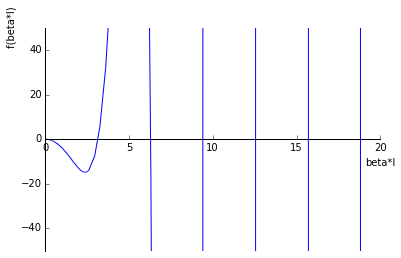


znaci da su tocna rjesenja beta*l =  [0, pi, I*pi]


In [13]:
N = sympy.Matrix(np.array([(M.row(rlp-1)).subs(x,0),
                            (M.row(rld-1)).subs(x,0),
                            (M.row(rdp-1)).subs(x,l),
                            (M.row(rdd-1)).subs(x,l)]))

result = sympy.simplify(sympy.det(N))
print ('\n' + 'uvjet za netrivijalno osciliranje: ', result)
result = result.subs(beta*l,x) # zamjena oznaka radi jednostavnijeg pisanja u nastavku
plot(result,(x,0,20),ylim=(-50, 50),xlabel="beta*l",ylabel="f(beta*l) ")

try:
    nultocke = sympy.solve(result)
    if nultocke != []:
        print ('\n' + 'znaci da su tocna rjesenja beta*l = '), nultocke
    else:
        raise Exception
#ovdje se poziva nelinearni solver ukoliko se pokaze da je potreban
except: 
    print ('\n' + 'nema tocnih rjesenja, ')
    pokusaj = 0
    nultocke = []
    while type(pokusaj) == int:
        try:
            pokusaj = int(raw_input("uz pomoc grafa pokusaj naci priblizna rjesenja: "))
            nultocke += [sympy.nsolve(result,x,pokusaj, dict = "True")]
            print (nultocke)
        except ValueError:
            break

## Parametri nosača korištenog u eksperimentu i konačno rješenje

In [21]:
l = 2.0 #m
h, b = 0.013, 0.040 
I = b * h**3 / 12
E = 12.5 * 10**9 #N/m^2
gustoca = 0.650 * (7.0/8) /l #kg

beta = np.array(nultocke) / l
omega = np.power(beta*l,2) * np.sqrt(E*I/(gustoca*l**4))

print ("frekvencije za odabrane rubne uvjete"), omega/(2*np.pi)

frekvencije za odabrane rubne uvjete [0 0.713877741374261*pi**2 -0.713877741374261*pi**2]


In [16]:
#mozda ubaciti interact za rubne uvjete?

#from __future__ import print_function
#from ipywidgets import interact, interactive, fixed
#import ipywidgets as widgets

#def f(x):
#    return x

#interact(f, x=10);